> 在此处，我将会充分联系二叉树的遍历原则。  
    > 1.前序遍历  
        >   a.递归调用  
        >   b.迭代法  
    > 2.中序遍历  
        >   a.递归调用  
        >   b.迭代法  
    > 3.后序遍历  
        >   a.递归调用  
        >   b.迭代法  
    > 4.层序遍历  
        >   a.迭代法   
        >   b.锯齿遍历


# 前序遍历 preorder

给你二叉树的根节点 root ，返回它节点值的 前序 遍历。

 

示例 1：

输入：root = [1,null,2,3]

输出：[1,2,3]

解释：

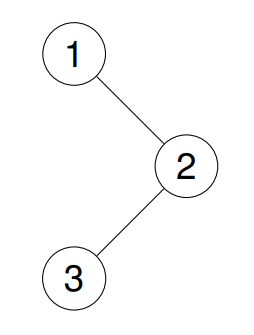


示例 2：

输入：root = [1,2,3,4,5,null,8,null,null,6,7,9]

输出：[1,2,4,5,6,7,3,8,9]

解释：

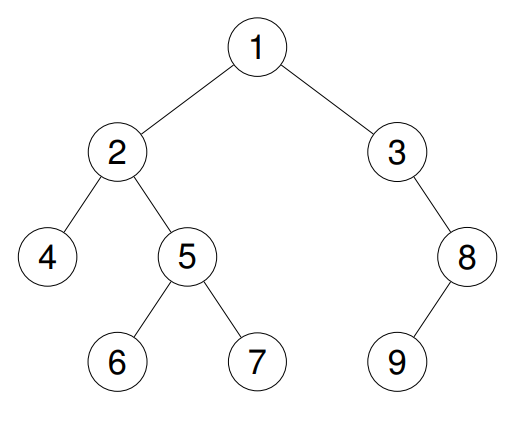

示例 3：

输入：root = []

输出：[]

示例 4：

输入：root = [1]

输出：[1]

 

提示：

树中节点数目在范围 [0, 100] 内
-100 <= Node.val <= 100
 

进阶：递归算法很简单，你可以通过迭代算法完成吗？

In [2]:
class TreeNode:
    def __init__(self, val=0, left = None, right = None):
        self.val = val
        self.left = left
        self.right = right

def list2TreeNode(vals):
    if not vals: return None
    def inner(index):
        if index>=len(vals) or vals[index] is None:
            return None
        node = TreeNode(vals[index])
        node.left = inner(2*index + 1)
        node.right = inner(2*index + 2)
        return node
    return inner(0)


In [ ]:
# 递归遍历
def preorder_1(root):
    ans = []
    def dfs(root):
        nonlocal ans 
        if not root:return
        ans.append(root.val)
        dfs(root.left)
        dfs(root.right)
    dfs(root)
    return ans

# 迭代遍历-1
# 迭代:使用栈来完成,我们先将根节点放入栈中,然后将其弹出,依次将该弹出的节点的右节点,和左节点,
# **注意顺序,**是右,左,为什么?因为栈是先入后出的,我们要先输出右节点,所以让它先进栈.
def preorder_2(root):
    ans = []
    if not root: return [] #无元素处理
    stack = [root]
    #自己建立一个栈用于模拟递归过程
    while stack:
        node = stack.pop()
        ans.append(node.val)
        if node.right:
            stack.append(node.right)
        if node.left:
            stack.append(node.left)
    return ans

def pre

def preorder_3(root):
    if not root:return []
    node, stack, ans = root, [], []
    while node or stack:
        while node:#先一直遍历到最左边
            ans.append(node.val)
            #添加node的做节点直到最后
            stack.append(node)
            node = node.left
        #前序遍历就是 根-左-右
        temp = stack.pop() #后进先出原则，弹出一个元素，就到他的右节点
        node = temp.right
    return ans



        


In [10]:
root = [1,2,3,4,5,None,8,None,None,6,7,None,None,None,9]
root = list2TreeNode(root)
preorder_2(root)

[1, 2, 4, 5, 6, 7, 3, 8, 9]

# 中序遍历 inorder

给定一个二叉树的根节点 root ，返回 它的 中序 遍历 。

 

示例 1：

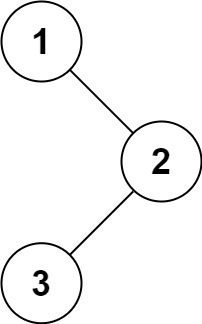

输入：root = [1,null,2,3]
输出：[1,3,2]

示例 2：

输入：root = [1,2,3,4,5,null,8,null,null,6,7,9]

输出：[1,2,4,5,6,7,3,8,9]

解释：

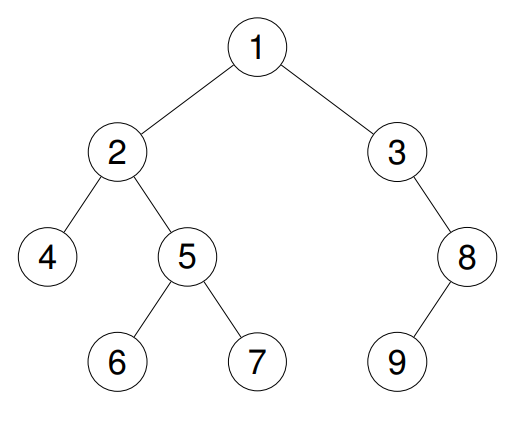


示例 3：

输入：root = []
输出：[]

示例 4：

输入：root = [1]
输出：[1]
 

提示：

树中节点数目在范围 [0, 100] 内
-100 <= Node.val <= 100
 

进阶: 递归算法很简单，你可以通过迭代算法完成吗？

In [11]:
def inorder_1(root):
    res = []
    def dfs(root):
        nonlocal res
        if not root:return []
        dfs(root.left)
        res.append(root.val)
        dfs(root.right)
    dfs(root)
    return res

def inorder_2(root):
    if not root: return []
    res, stack, node = [], [], root
    while stack or node:
        while node: # 一直入栈，入栈到最深的left
            stack.append(node)
            node = node.left
        temp = stcak.pop()
        res.append(temp.val)
        node = temp.right
    return res


In [12]:
root = [1,2,3,4,5,None,8,None,None,6,7,None,None,None,9]
root = list2TreeNode(root)
inorder_1(root)

[4, 2, 6, 5, 7, 1, 3, 8, 9]

# 后序遍历 postorder

给你一棵二叉树的根节点 root ，返回其节点值的 后序遍历 。

 

示例 1：

输入：root = [1,null,2,3]

输出：[3,2,1]

解释：

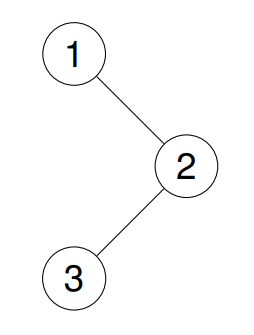

示例 2：

输入：root = [1,2,3,4,5,null,8,null,null,6,7,9]

输出：[4,6,7,5,2,9,8,3,1]

解释：

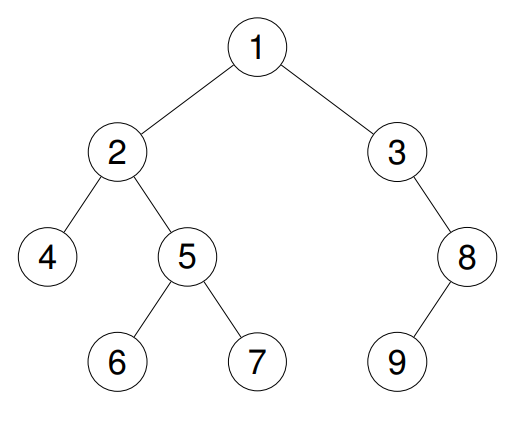


示例 3：

输入：root = []

输出：[]

示例 4：

输入：root = [1]

输出：[1]

 

提示：

树中节点的数目在范围 [0, 100] 内
-100 <= Node.val <= 100
 

进阶：递归算法很简单，你可以通过迭代算法完成吗？

In [23]:
def postorder_1(root):
    res = []
    def dfs(root):
        nonlocal res
        if not root:return []
        dfs(root.left)
        dfs(root.right)
        res.append(root.val)
    dfs(root)
    return res

def postorder_2(root):
    if not root: return []
    res, stack = [], [root]
    while stack:
        node = stack.pop()
        if node.left:
            stack.append(node.left)
        if node.right:
            stack.append(node.right)
        res.append(node.val)
    return res[::-1]
        
def postorder_3(root):
    #后续遍历
    if not root: return []

    res, stack, node = [], [], root
    while stack or node:
        while node:
            res.append(node.val)
            stack.append(node)
            node = node.right
        temp = stack.pop()
        node = temp.left
    
    return res[::-1]


In [25]:
root = [1,2,3,4,5,None,8,None,None,6,7,None,None,None,9]
# root = [1,2,3,4,5,null,8,null,null,6,7,9]
root = list2TreeNode(root)
postorder_2(root)

[4, 6, 7, 5, 2, 9, 8, 3, 1]

# 层序遍历 levelorder

给你二叉树的根节点 root ，返回其节点值的 层序遍历 。 （即逐层地，从左到右访问所有节点）。

 

示例 1：

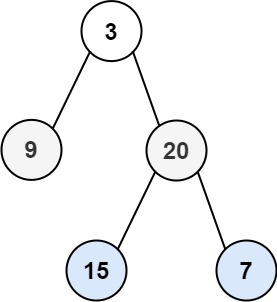

输入：root = [3,9,20,null,null,15,7]
输出：[[3],[9,20],[15,7]]
示例 2：

输入：root = [1]
输出：[[1]]
示例 3：

输入：root = []
输出：[]
 

提示：

树中节点数目在范围 [0, 2000] 内
-1000 <= Node.val <= 1000

In [32]:
from collections import deque
def levelorder_1(root):
    if not root: return []
    res, stack = [], [root]
    while stack:
        nxt = []
        vals = []
        for node in stack:
            vals.append(node.val)
            if node.left:
                nxt.append(node.left)
            if node.right:
                nxt.append(node.right)
        stack = nxt
        res.append(vals)
    return res

def levelorder_2(root):
    if not root: return []
    res, queue = [], deque([root])
    while queue:
        vals = []
        for _ in range(len(queue)):
            node = queue.popleft()
            vals.append(node.val)
            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)
        res.append(vals)
    return res

In [33]:
root = [3,9,20,None,None,15,7]
root = list2TreeNode(root)
levelorder_2(root)

[[3], [9, 20], [15, 7]]